In [1]:
import matplotlib.pyplot as plt
from plot import make_plots

# Important: 
For running properly this notebook, you need to install the following libraries:
- seaborn==0.8.1
- pandas==1.2.2

Also if it happens to you that the plots are empty, modify the seaborn source code and add the following line in seaborn/timeseries.py class tsplot after line 296:
```python
    df_c = df_c.pivot(unit, time, value)
    # Fill the Nan values using linear interpolation
    df_c = df_c.interpolate(axis=1)
```

Plotting from...

outputs/LunarLander-v2
outputs/LunarLander-v3

No file named config.json
Loaded data from outputs/LunarLander-v2/experiment_22_266
No file named config.json
Loaded data from outputs/LunarLander-v2/experiment_23_234
No file named config.json
Loaded data from outputs/LunarLander-v3/experiment_22_266
No file named config.json
Loaded data from outputs/LunarLander-v3/experiment_23_234


/home/amate/Documents/mai-upc/mai_venv/lib/python3.10/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(7.472222222222216, 0.5, 'Average Score')

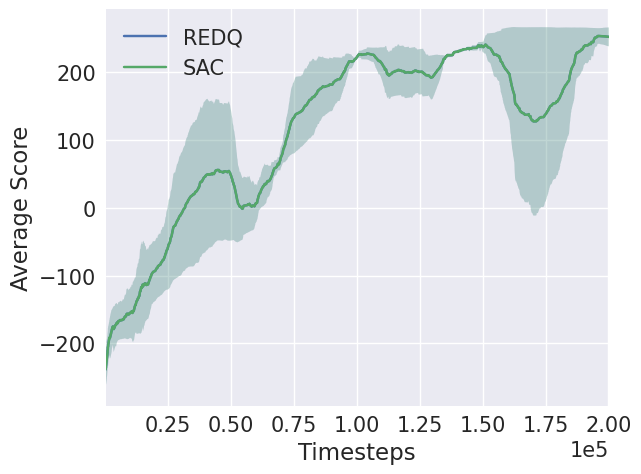

In [3]:
make_plots(
    ["outputs/LunarLander-v2", "outputs/LunarLander-v3"],
    xaxis="timesteps_history",
    legend=["REDQ", "SAC"],
    values=["score_history"],
    count=False,
    smooth=100,
    select=None,
    exclude=None,
    estimator="mean",
)

plt.xlabel("Timesteps")
plt.ylabel("Average Score")